In [3]:
import sympy as sp
import numpy as np

In [4]:
r = sp.Symbol('r', real = True)
theta =sp.Symbol(r'\theta', real = True)
K_I = sp.Symbol('K_I', real = True)
K_II = sp.Symbol('K_{II}', real = True)
sigma = sp.Symbol(r'\sigma', real = True)
a = sp.Symbol('a', real = True)
beta = sp.Symbol(r'\beta', real = True)

In [5]:
K_I = sigma * (sp.sin(beta))**2 * sp.sqrt(sp.pi * a)
K_I
K_II = sigma * sp.sin(beta) * sp.cos(beta) * sp.sqrt(sp.pi * a)
K_II

sqrt(pi)*\sigma*sqrt(a)*sin(\beta)*cos(\beta)

In [6]:
sig_the = (1/(2 * sp.sqrt(2 * sp.pi *r)))* sp.cos(theta/2)* (K_I * (1+sp.cos(theta)) - 3 * K_II * sp.sin(theta))
sig_the

sqrt(2)*(sqrt(pi)*\sigma*sqrt(a)*(cos(\theta) + 1)*sin(\beta)**2 - 3*sqrt(pi)*\sigma*sqrt(a)*sin(\beta)*sin(\theta)*cos(\beta))*cos(\theta/2)/(4*sqrt(pi)*sqrt(r))

In [7]:
d_sig_the = sig_the.diff(theta)
d_sig_theta = sp.simplify(d_sig_the)
d_sig_theta

3*sqrt(2)*\sigma*sqrt(a)*(-2*cos(\beta - 3*\theta/2) + 2*cos(\beta + \theta/2) + sin(\beta - 2*\theta)/sin(\theta/2) - sin(\beta + 2*\theta)/sin(\theta/2))*sin(\beta)/(32*sqrt(r))

In [11]:
params = {sigma: 1, a: 1, r: 1}

In [12]:
b = sp.trigsimp(d_sig_theta.subs(params)) 
g = sp.collect(b, theta)
g

3*sqrt(2)*(-2*cos(\beta - 3*\theta/2) + 2*cos(\beta + \theta/2) + sin(\beta - 2*\theta)/sin(\theta/2) - sin(\beta + 2*\theta)/sin(\theta/2))*sin(\beta)/32

In [26]:
from sympy.solvers.solveset import solvify, nonlinsolve
#solvify(b, theta, sp.S.Reals)
#ab = sp.solve(g, theta) #exclude = [beta] ,  quick = True
#ab =sp.solveset(g, theta, sp.S.Reals)
#nonlinsolve([g], [theta])
#ab[2]

In [14]:
#K_I = sp.Function(r'K_I')(sigma, beta, a)
#subs_K_I = {K_I : sigma * (sp.sin(beta))**2 * sp.sqrt(sp.pi * a)}
#K_II = sp.Function(r'K_{II}')(sigma, beta, a) #sigma * sp.sin(beta) * sp.cos(beta) * sp.sqrt(sp.pi * a)
#subs_K_II = {K_II: sigma * sp.sin(beta) * sp.cos(beta) * sp.sqrt(sp.pi * a)}
#subs_K_I

In [15]:
#p = ab[2].xreplace(list(zip([K_I, K_II], [K_I_, K_II_])))
#p = ab[2].subs(list(zip([K_I, K_II], [K_I_, K_II_])))
#p

In [16]:
#get_the = sp.lambdify(beta,p,'numpy')

In [17]:
#from paper
d_s_d_t = K_I*sp.sin(theta) + K_II * (3*sp.cos(theta) - 1)
d_s_d_t

sqrt(pi)*\sigma*sqrt(a)*(3*cos(\theta) - 1)*sin(\beta)*cos(\beta) + sqrt(pi)*\sigma*sqrt(a)*sin(\beta)**2*sin(\theta)

In [18]:
final = sp.simplify(d_s_d_t / (sigma * sp.sqrt(sp.pi * a)))
final

(-cos(\beta) + 2*cos(\beta - \theta) + cos(\beta + \theta))*sin(\beta)

In [19]:
a = sp.expand_trig(final)
a

(sin(\beta)*sin(\theta) + 3*cos(\beta)*cos(\theta) - cos(\beta))*sin(\beta)

In [20]:
sol = sp.solve(a, theta)
sol[0]

2*atan((sqrt(2*tan(\beta/2)**4 - 3*tan(\beta/2)**2 + 2) - tan(\beta/2))/(2*(tan(\beta/2)**2 - 1)))

In [22]:
sol_ = sol[0]
sol_

2*atan((sqrt(2*tan(\beta/2)**4 - 3*tan(\beta/2)**2 + 2) - tan(\beta/2))/(2*(tan(\beta/2)**2 - 1)))

In [23]:
get_theta = sp.lambdify(beta, sol_, 'numpy')
get_theta

<function _lambdifygenerated(Dummy_171)>

In [24]:
def get_response(beta=90*np.pi/180, n_steps=8): #,n_steps=4
    theta_rec = [] 
    beta_o = np.linspace(0,beta,n_steps+1)
    for be in beta_o:
        theta = get_theta(be)
        theta_rec.append(theta)
        #print(theta*180/np.pi)
        #print(be)
    return (
        beta_o, np.array(theta_rec,dtype=np.float_)
    )

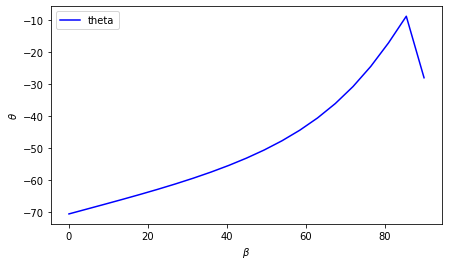

In [25]:
import matplotlib.pyplot as plt
fig, ((ax1)) = plt.subplots(1,1,figsize=(7,4))
colors = ['blue','red', 'green', 'black', 'magenta', 'pink']
n_step_range = np.arange(1,2)*20
beta = 90*np.pi/180
for n_step, color in zip(n_step_range, colors):
    beta_o, theta_arr = get_response(beta,n_step) 
    ax1.plot(beta_o*180/np.pi, theta_arr[:]*180/np.pi, color=color, 
         label='theta')
    ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
    ax1.legend()